In [15]:
import pandas as pd
import numpy as np

In [16]:
# DatetiemImdex
dates = pd.date_range('2020-01-01', periods=48, freq='M')
# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,
'trend': trend_factor,
'cycle': cycle_factor,
'seasonal': seasonal_factor,
'irregular': irregular_factor},
index=dates)

In [17]:
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,5.904327,1.491495


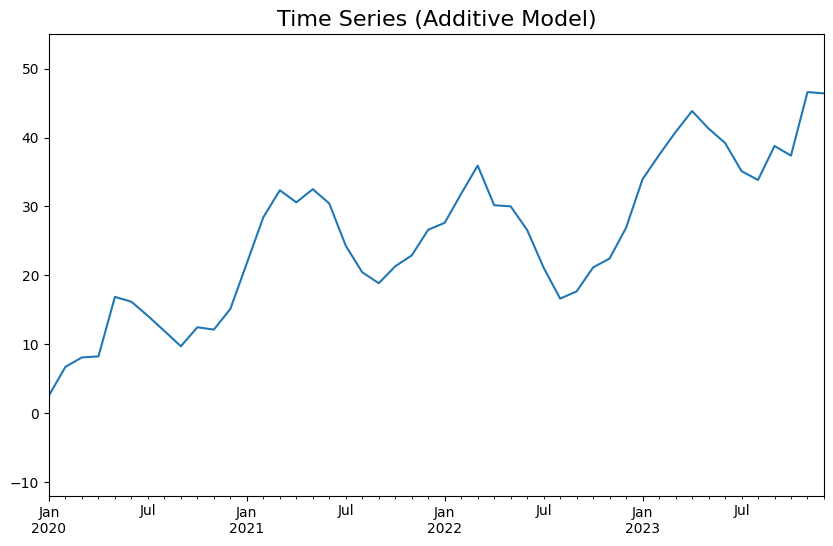

In [18]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 6])
df.timeseries.plot()
plt.title('Time Series (Additive Model)', fontsize=16)
plt.ylim(-12, 55)
plt.show()

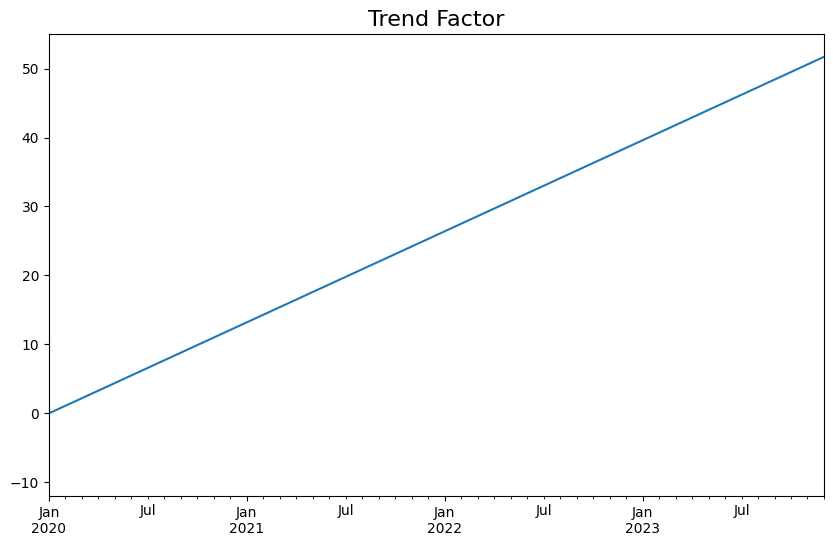

In [19]:
# Trend variation

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

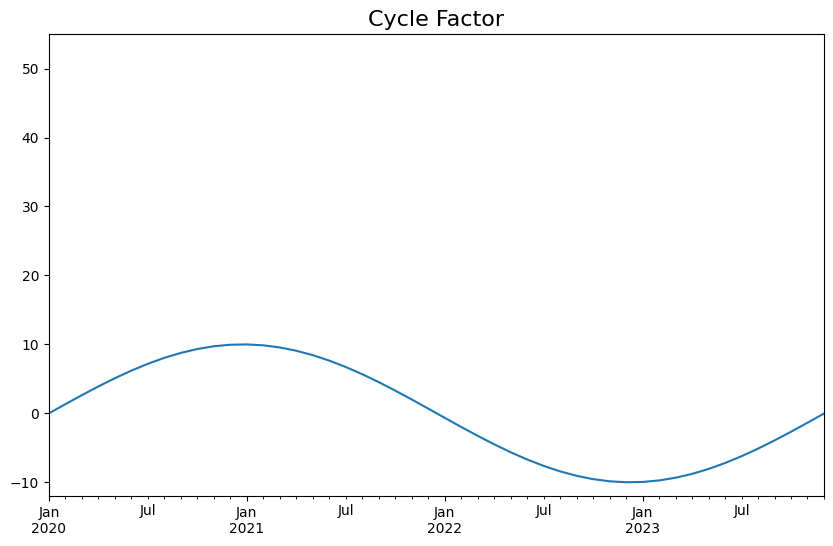

In [20]:
# Cycle variation

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

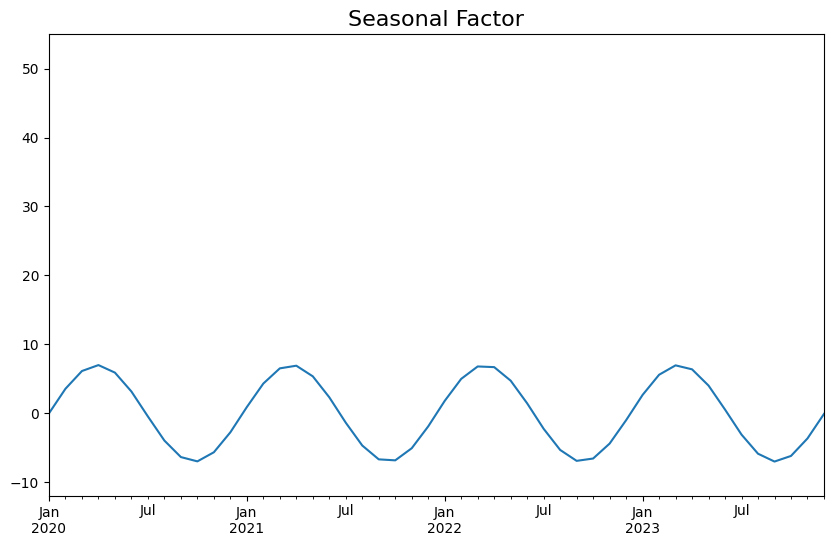

In [21]:
# Seasonal variation

plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title('Seasonal Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

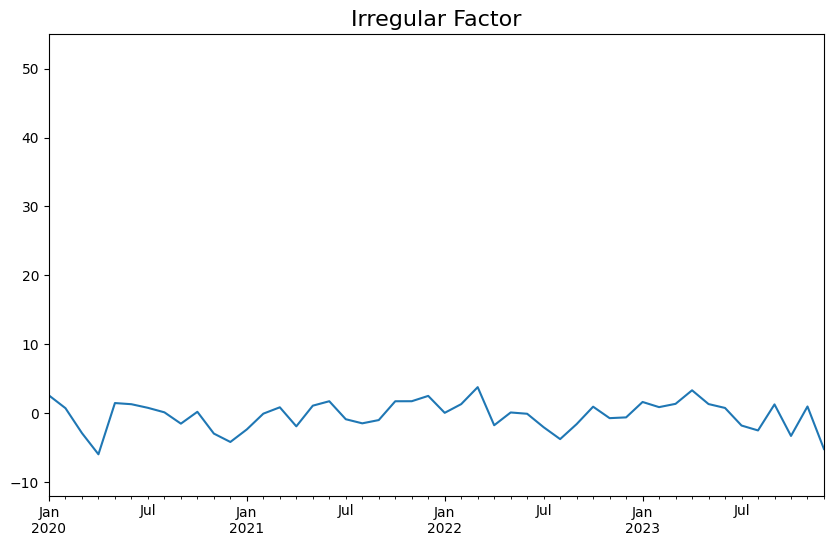

In [22]:
# Irregular variation

plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title('Irregular Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

In [23]:
# 평활화 기법
import FinanceDataReader as fdr
from datetime import datetime

In [24]:
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start='2010')

In [25]:
# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800
2023-05-15,173.160004,173.210007,171.470001,172.070007,172.070007,37266700
2023-05-16,171.990005,173.139999,171.800003,172.070007,172.070007,42110300
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400


Text(0.5, 1.0, 'Close Price for Apple')

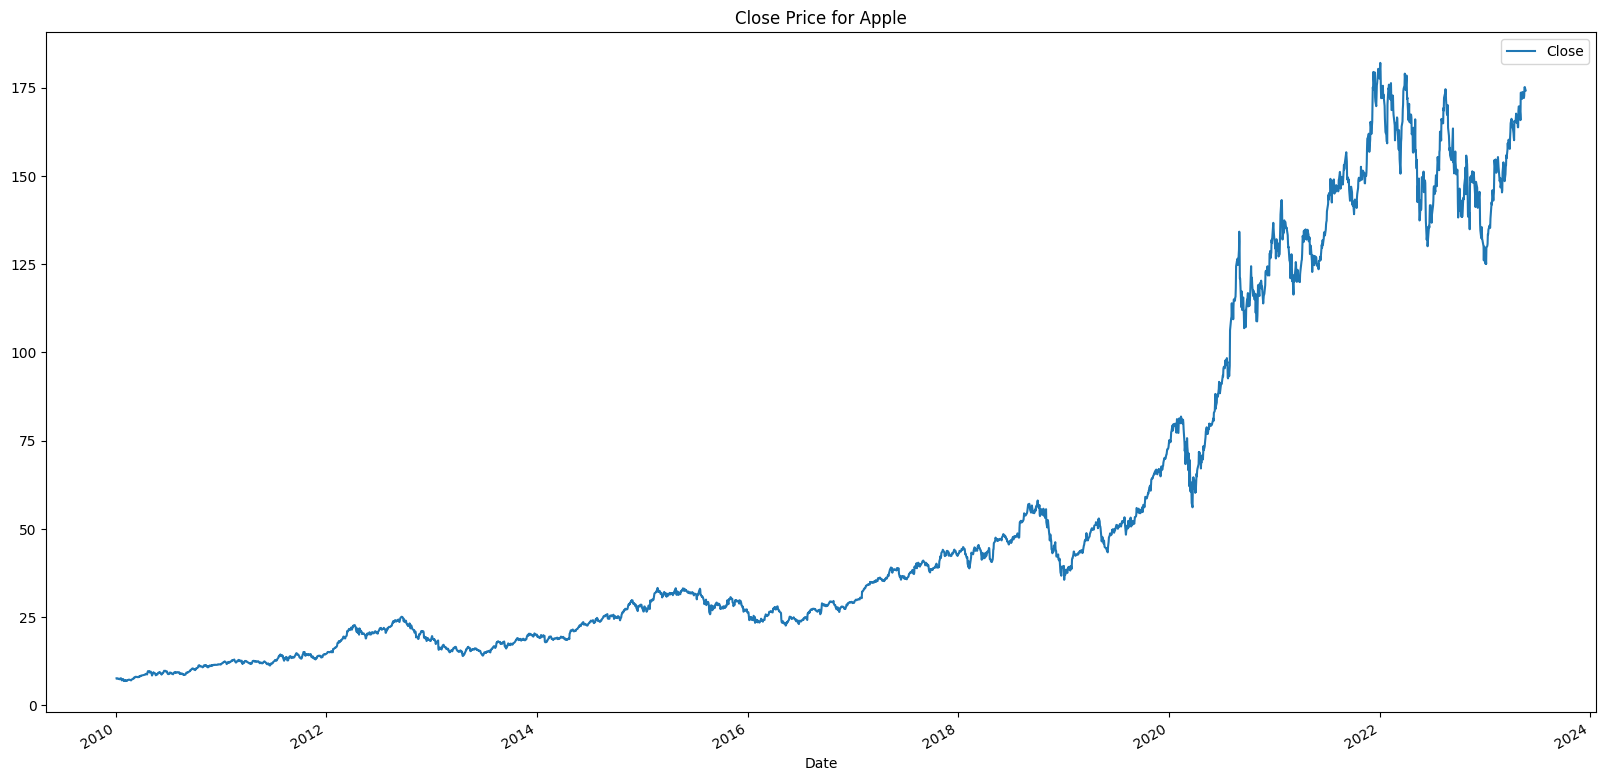

In [26]:
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

<Axes: xlabel='Date'>

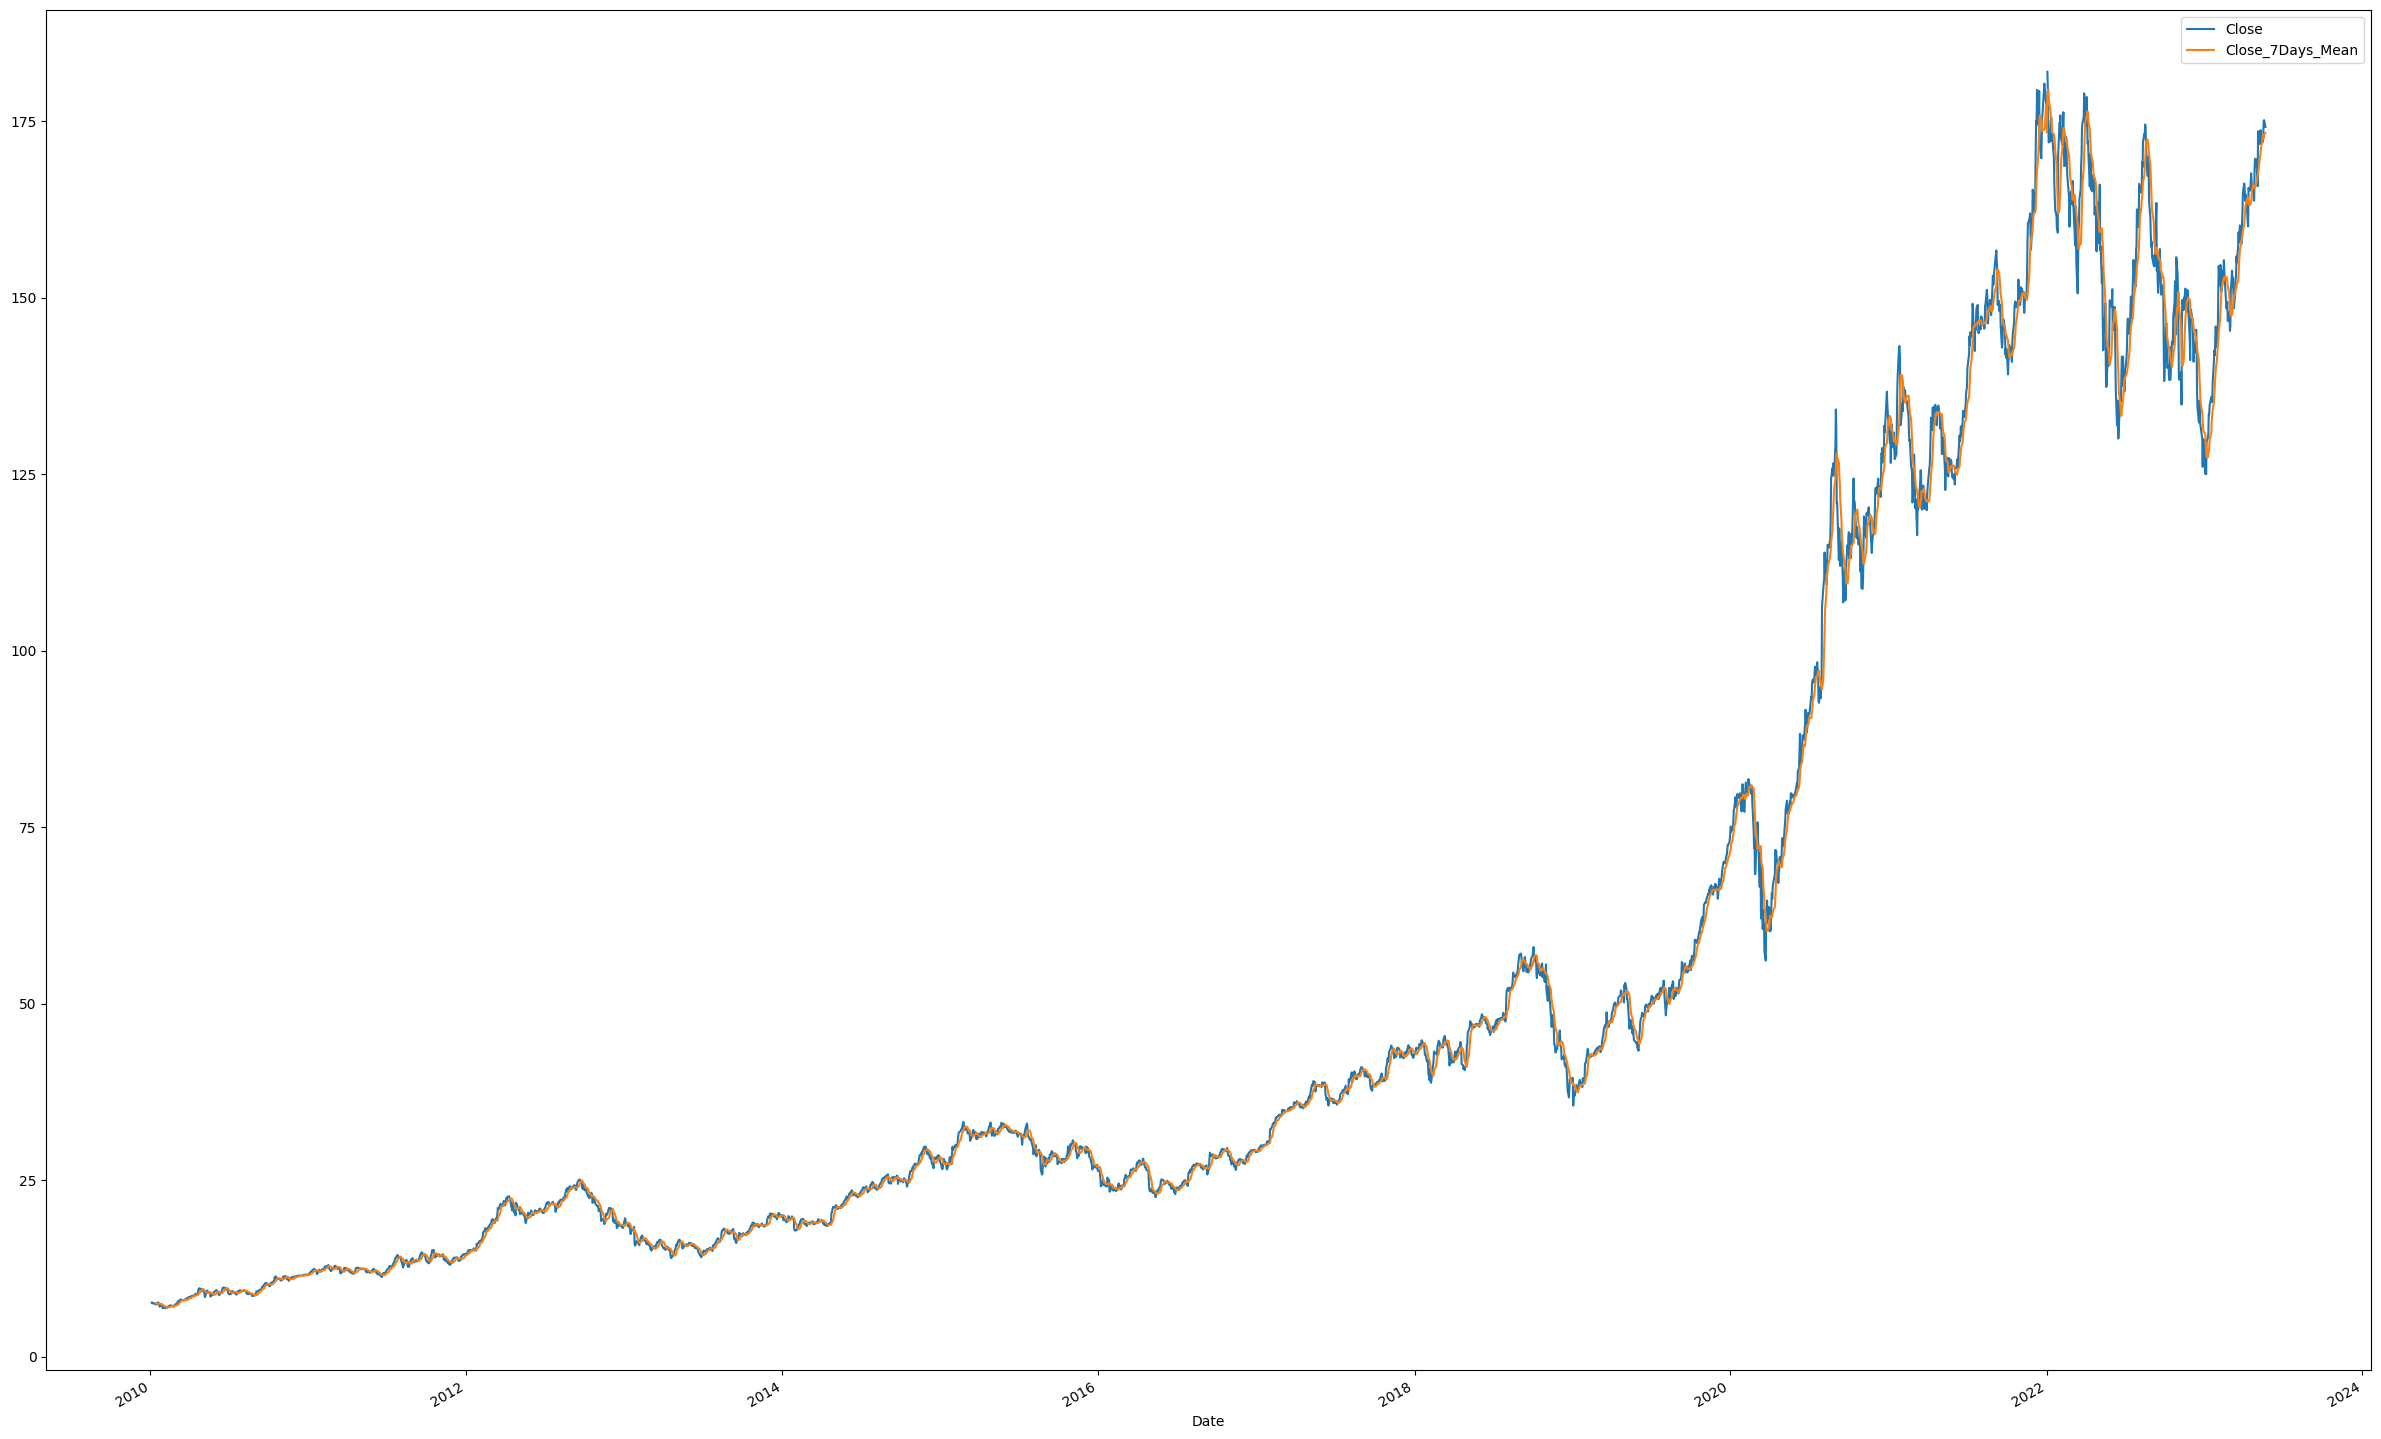

In [27]:
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1) 
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))
# 7일전 평균값 그래프 + 종가 그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

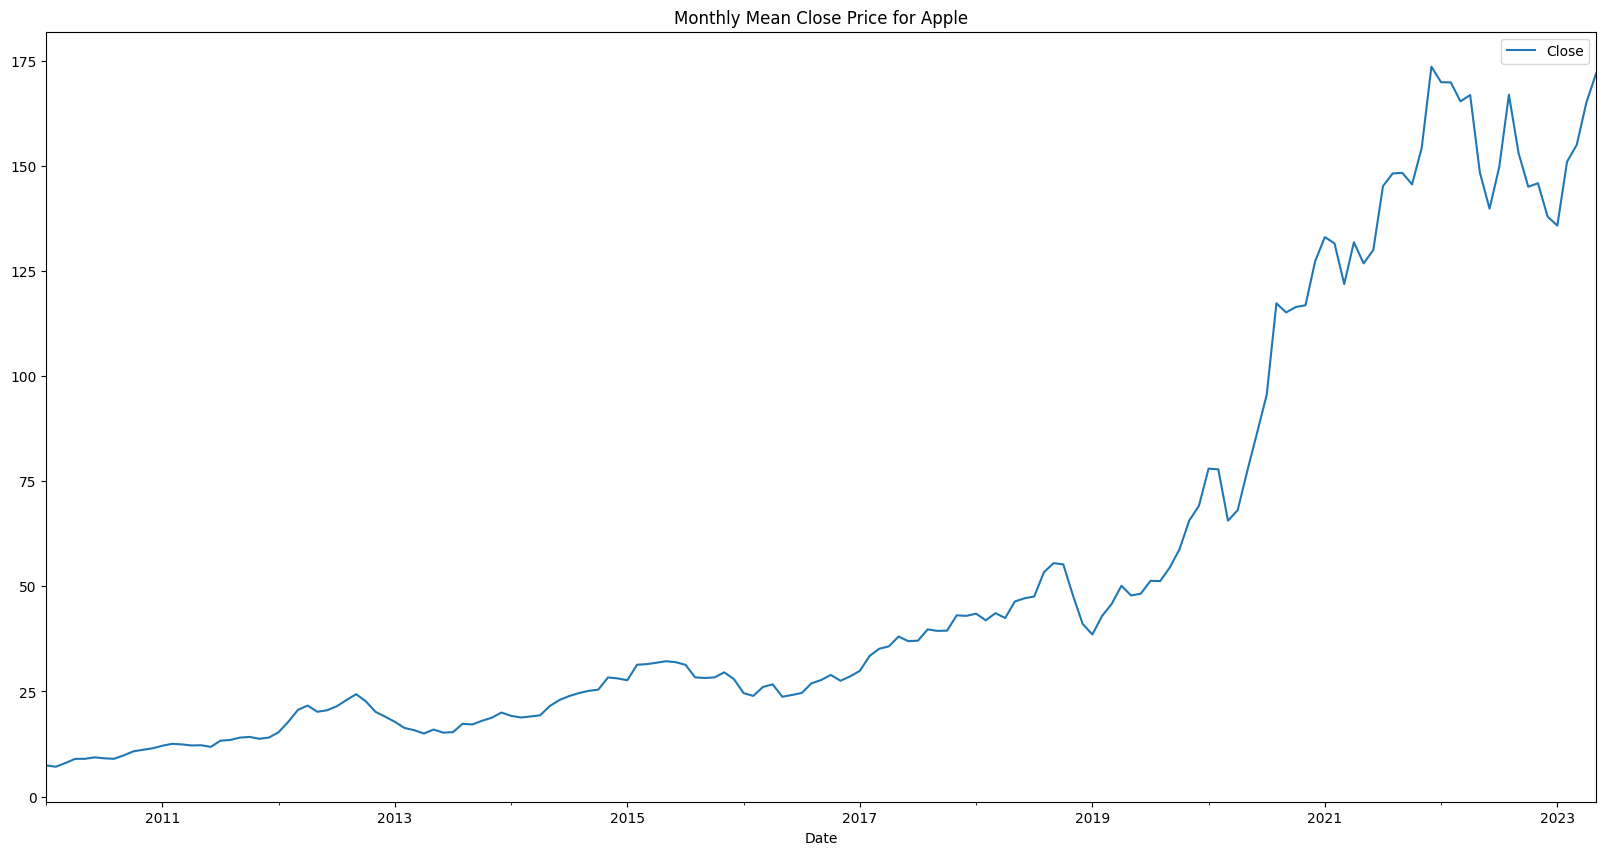

In [28]:
# 월단위로 주식 가격의 평균을 샘플링 
df_apple_monthly = df_apple.resample(rule='M').mean() 
# 마지막 컬럼(Close_7Days_Mean) 제외 
df_apple_monthly = df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화 
df_apple_monthly[['Close']].plot(figsize=(20,10)) 
plt.title('Monthly Mean Close Price for Apple')

<Axes: xlabel='Date'>

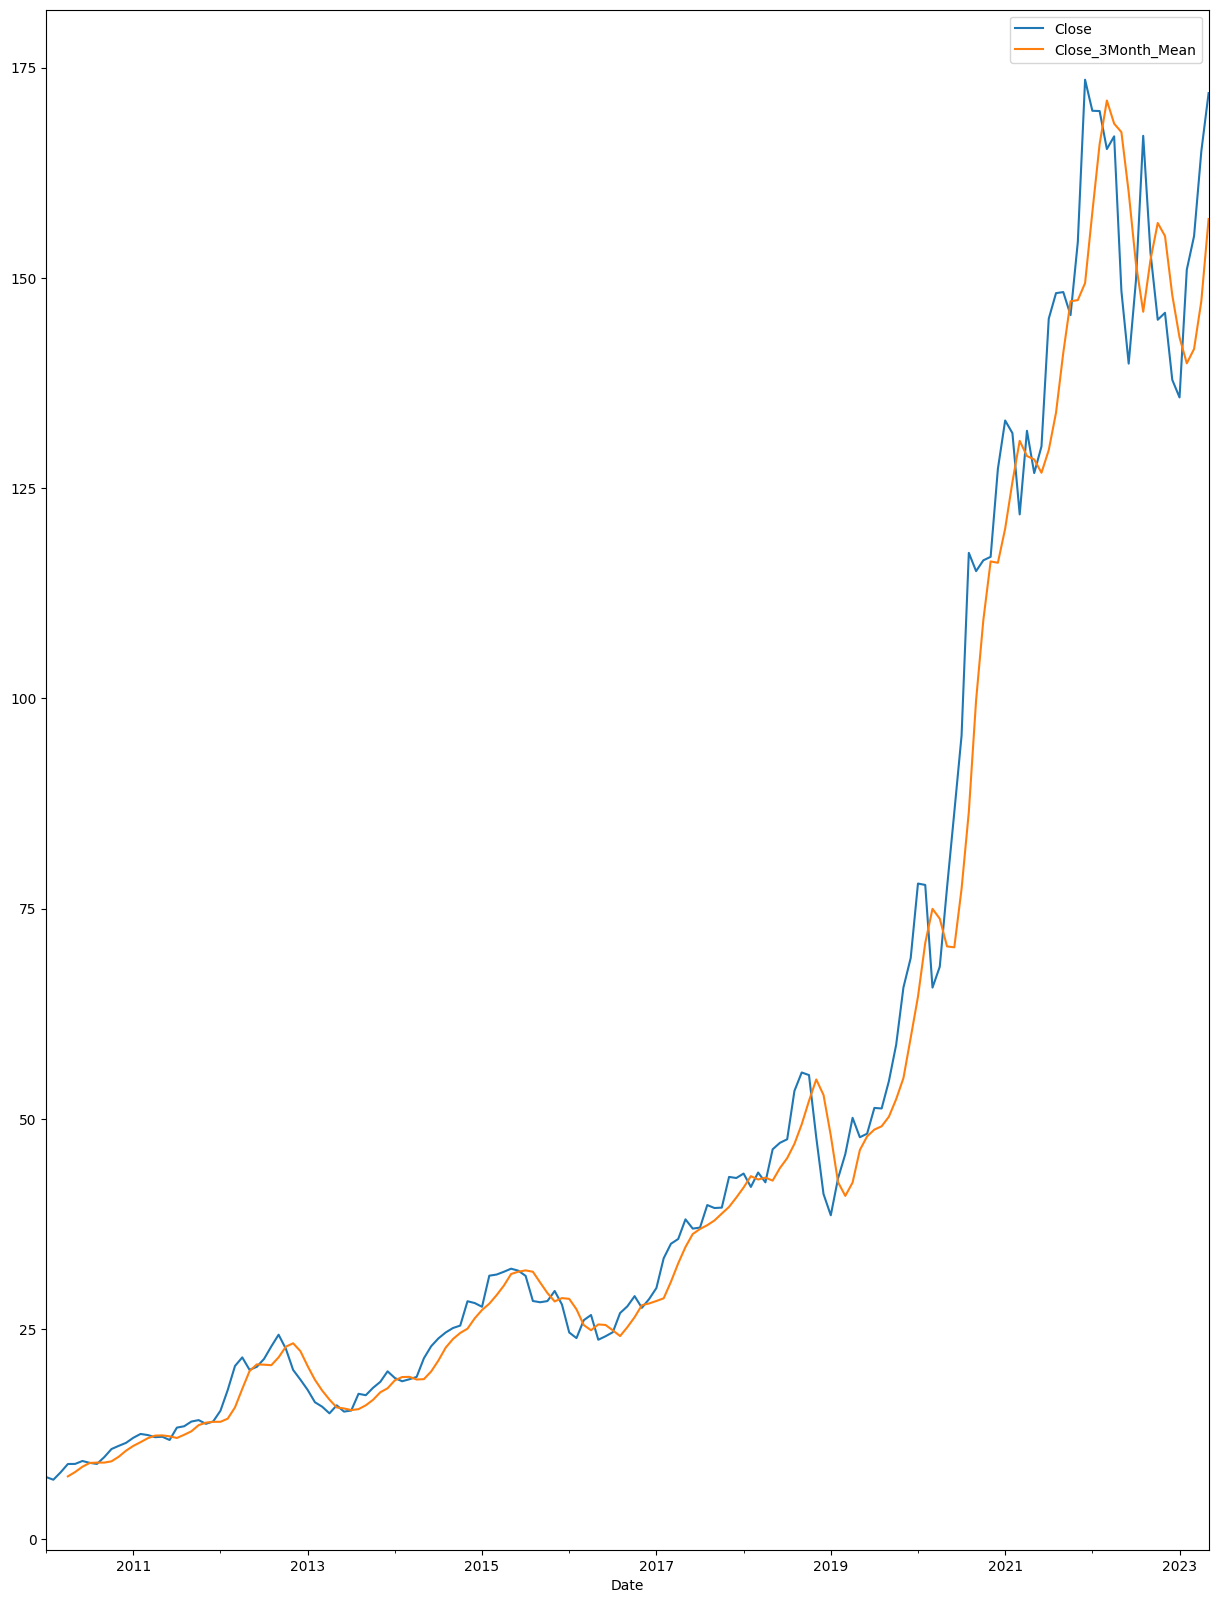

In [29]:
df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean().shift(1) 
df_apple_monthly[['Close', 'Close_3Month_Mean']].plot(figsize=(15,20))

In [33]:
df = pd.read_csv('../Datasets/a10.csv', parse_dates=['date'], index_col='date')

In [35]:
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


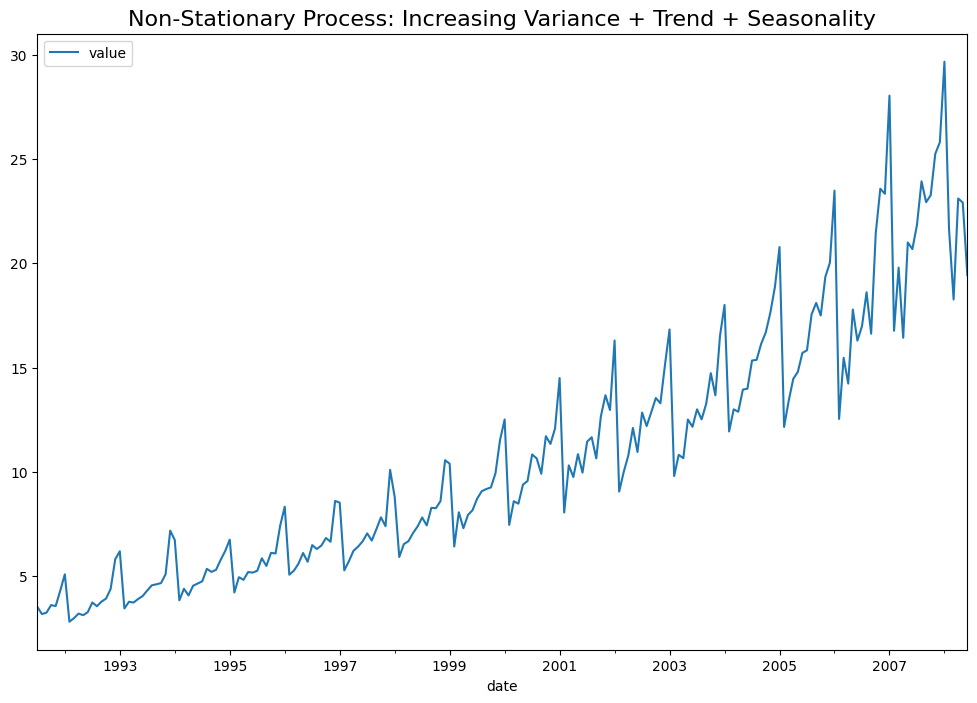

In [36]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

In [38]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
df_vst = np.log(df.value) 
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

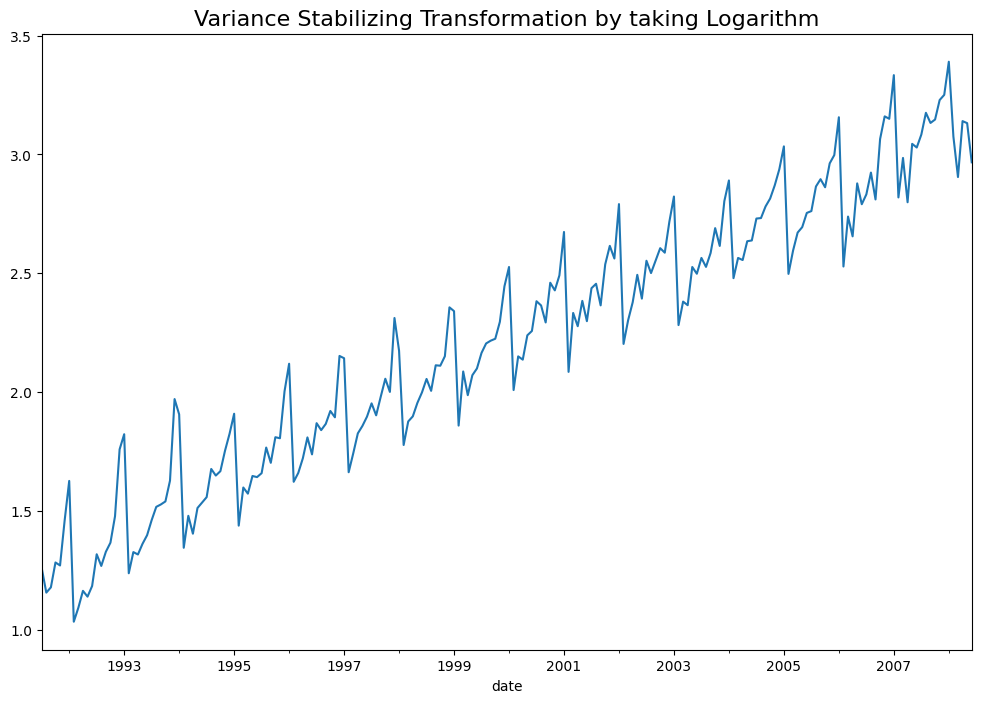

In [40]:
## plotting
df_vst.plot(figsize=(12, 8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()

<Axes: xlabel='date'>

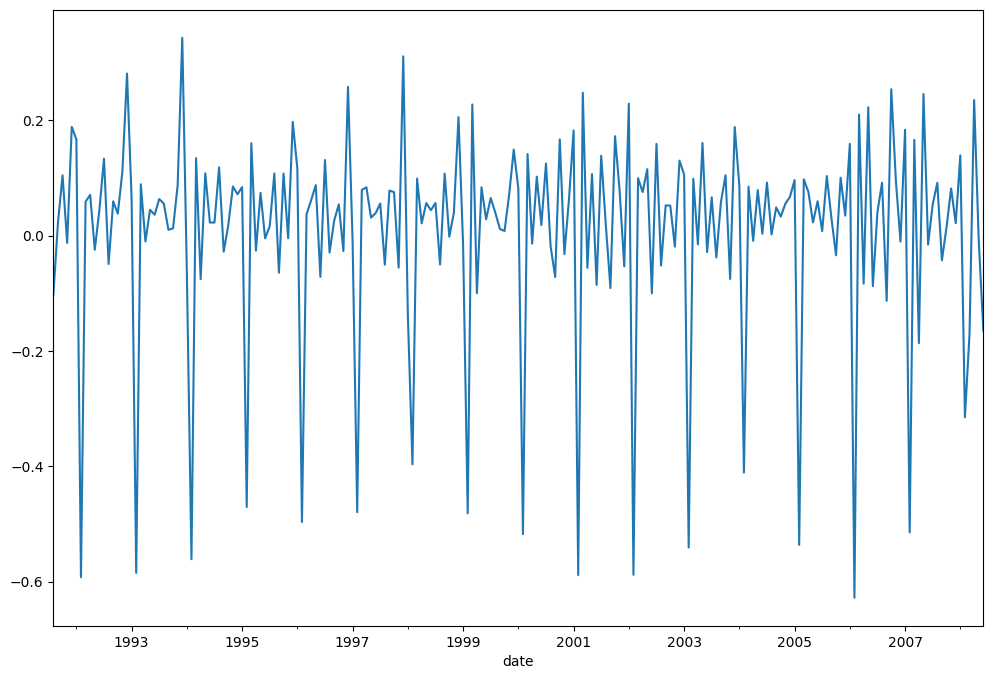

In [41]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
# plt.title("De-trend by 1st order Differencing", fontsize=16) # plt.show()